In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [6]:
df = pd.read_csv('data/cleaned_data.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionAmount (INR),CustomerAge,month_year
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,25.0,22,2016-02-01
1,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,459.0,20,2016-02-01
2,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,2060.0,43,2016-02-01
3,T5,C9031234,1988-03-24,F,MUMBAI,6714.43,2016-02-08,1762.5,28,2016-02-01
4,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,566.0,24,2016-02-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900359 entries, 0 to 900358
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            900359 non-null  object 
 1   CustomerID               900359 non-null  object 
 2   CustomerDOB              900359 non-null  object 
 3   CustGender               900359 non-null  object 
 4   CustLocation             900359 non-null  object 
 5   CustAccountBalance       900359 non-null  float64
 6   TransactionDate          900359 non-null  object 
 7   TransactionAmount (INR)  900359 non-null  float64
 8   CustomerAge              900359 non-null  int64  
 9   month_year               900359 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 68.7+ MB


In [8]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [9]:
rfm_df = df.groupby('CustomerID').agg({'TransactionDate':'max', 'TransactionID':'count', 'TransactionAmount (INR)':'sum'})
rfm_df.reset_index(inplace=True)
rfm_df.head()

,CustomerID,TransactionDate,TransactionID,TransactionAmount (INR)
0,C1010011,2016-09-26,2,5106.0
1,C1010012,2016-08-14,1,1499.0
2,C1010014,2016-07-08,2,1455.0
3,C1010018,2016-09-15,1,30.0
4,C1010028,2016-08-29,1,557.0


In [10]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776783 entries, 0 to 776782
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CustomerID               776783 non-null  object        
 1   TransactionDate          776783 non-null  datetime64[ns]
 2   TransactionID            776783 non-null  int64         
 3   TransactionAmount (INR)  776783 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 23.7+ MB


### recency feature

In [11]:
rfm_df['Recency'] = df['TransactionDate'].max() - rfm_df['TransactionDate']
rfm_df['Recency'] = rfm_df['Recency'].dt.days
rfm_df.head()

,CustomerID,TransactionDate,TransactionID,TransactionAmount (INR),Recency
0,C1010011,2016-09-26,2,5106.0,74
1,C1010012,2016-08-14,1,1499.0,117
2,C1010014,2016-07-08,2,1455.0,154
3,C1010018,2016-09-15,1,30.0,85
4,C1010028,2016-08-29,1,557.0,102


In [12]:
rfm_df['Recency_score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5,4,3,2,1])
rfm_df.head()

,CustomerID,TransactionDate,TransactionID,TransactionAmount (INR),Recency,Recency_score
0,C1010011,2016-09-26,2,5106.0,74,5
1,C1010012,2016-08-14,1,1499.0,117,2
2,C1010014,2016-07-08,2,1455.0,154,2
3,C1010018,2016-09-15,1,30.0,85,4
4,C1010028,2016-08-29,1,557.0,102,4


### Monetary feature

In [13]:
rfm_df['Monetary_score'] = pd.qcut(rfm_df['TransactionAmount (INR)'], 5, labels=[1,2,3,4,5])
rfm_df.head()

,CustomerID,TransactionDate,TransactionID,TransactionAmount (INR),Recency,Recency_score,Monetary_score
0,C1010011,2016-09-26,2,5106.0,74,5,5
1,C1010012,2016-08-14,1,1499.0,117,2,4
2,C1010014,2016-07-08,2,1455.0,154,2,4
3,C1010018,2016-09-15,1,30.0,85,4,1
4,C1010028,2016-08-29,1,557.0,102,4,3


In [14]:
rfm_score = rfm_df[['CustomerID','Recency_score', 'Monetary_score', 'TransactionID']]
rfm_score.head()

,CustomerID,Recency_score,Monetary_score,TransactionID
0,C1010011,5,5,2
1,C1010012,2,4,1
2,C1010014,2,4,2
3,C1010018,4,1,1
4,C1010028,4,3,1


In [15]:
rfm_df.drop(['Recency_score', 'Monetary_score', 'TransactionDate'], axis=1, inplace=True)
rfm_df.head()

,CustomerID,TransactionID,TransactionAmount (INR),Recency
0,C1010011,2,5106.0,74
1,C1010012,1,1499.0,117
2,C1010014,2,1455.0,154
3,C1010018,1,30.0,85
4,C1010028,1,557.0,102


In [16]:
rfm_df.head()

,CustomerID,TransactionID,TransactionAmount (INR),Recency
0,C1010011,2,5106.0,74
1,C1010012,1,1499.0,117
2,C1010014,2,1455.0,154
3,C1010018,1,30.0,85
4,C1010028,1,557.0,102


In [17]:
rfm_df.drop(columns=['CustomerID'], inplace=True)
rfm_df.columns = ['Frequency', 'Monetary', 'Recency']

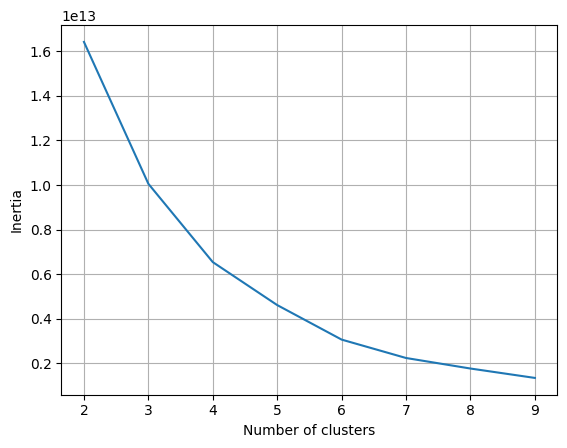

In [18]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

clusters = 10
inertia = []
sil_score = []
km = []

for k in range(2, clusters):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    km.append(kmeans)
    kmeans.fit(rfm_df)
    inertia.append(kmeans.inertia_)
    # sil = silhouette_score(rfm_df, kmeans.labels_, sample_size=50000)
    # sil_score.append(sil)

plt.grid()
plt.plot(range(2, clusters), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
# plt.plot(x=range(2, clusters), y=sil_score)
# plt.xlabel('Number of clusters')
# plt.ylabel('score')
# plt.show()

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(rfm_df)
silhouette_score(rfm_df, kmeans.labels_, sample_size=50000)

0.9238382819908865

In [20]:
rfm_df['labels'] = kmeans.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


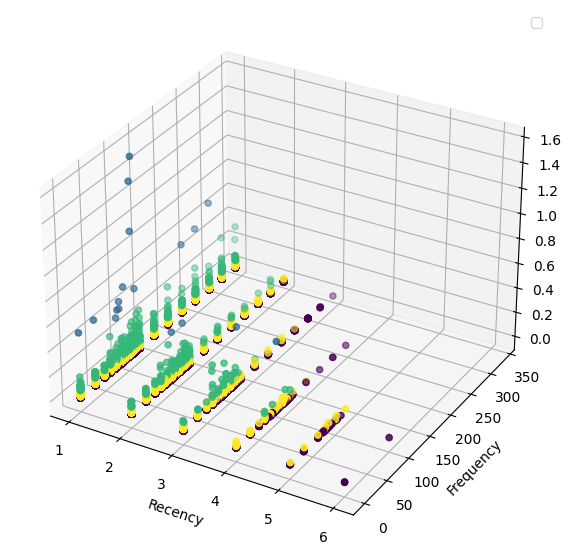

In [21]:
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.scatter3D(rfm_df['Frequency'], rfm_df['Recency'], rfm_df['Monetary'], c=rfm_df['labels'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

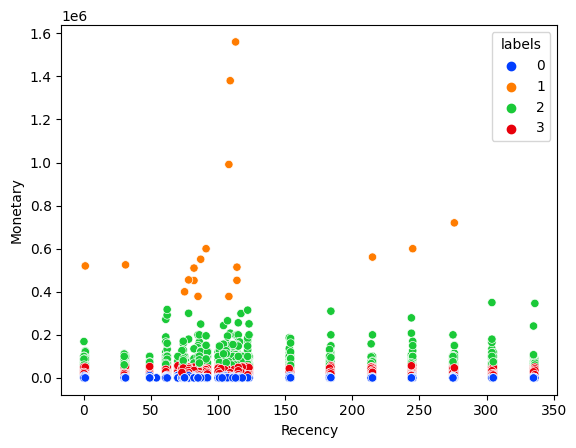

In [35]:
sns.scatterplot(x='Recency', y='Monetary', hue='labels', data=rfm_df, palette='bright')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

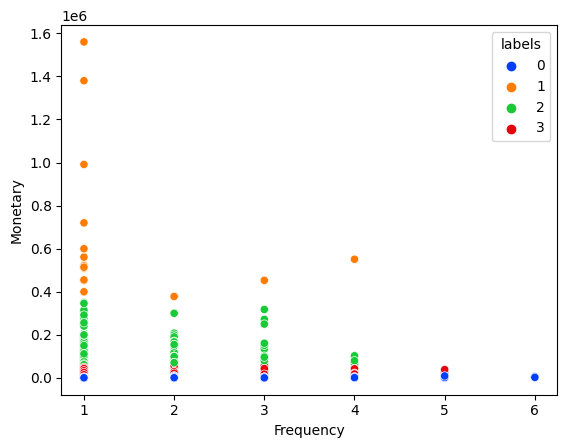

In [36]:
sns.scatterplot(x='Frequency', y='Monetary', hue='labels', data=rfm_df, palette='bright')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

From the above three plots, we can see that the clustering is happening mostly based on the monetry feature.

In [25]:
rfm_df.head()

,Frequency,Monetary,Recency,labels
0,2,5106.0,74,0
1,1,1499.0,117,0
2,2,1455.0,154,0
3,1,30.0,85,0
4,1,557.0,102,0


In [27]:
pred_cluster = kmeans.predict([[2, 20000, 30]])
pred_cluster

array([3], dtype=int32)

In [28]:
feature_ranges = rfm_df.groupby('labels').agg({'Frequency': ['min', 'max', 'mean'],
                                             'Monetary': ['min', 'max', 'mean'],
                                             'Recency': ['min', 'max', 'mean']})

feature_ranges.reset_index(inplace=True)

feature_ranges

labels Frequency                 Monetary                             \
               min max      mean        min         max           mean   
0      0         1   6  1.155949       0.00    11760.00    1043.000055   
1      1         1   4  1.388889  378205.07  1560034.99  641657.652778   
2      2         1   4  1.304393   57500.00   350000.00   92196.707521   
3      3         1   5  1.345084   11762.00    57300.00   22468.912964   

  Recency                   
      min  max        mean  
0       0  336  130.180956  
1       1  276  111.888889  
2       0  336  125.596234  
3       0  336  125.007100